<h1>
ALL ML MODELS IN SINGLE NOTEBOOK
</h1>

In [24]:
# importing the python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the model modules and classes
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# importing the pre processing modules nad classes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h2>1) LinearRegression</h2>

In [2]:
# importing the dataset into the pandas dataframe

df = pd.read_csv("F:\\Datasets\\USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# Cleaning the data

df.drop('Address', axis=1, inplace=True)

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<AxesSubplot:>

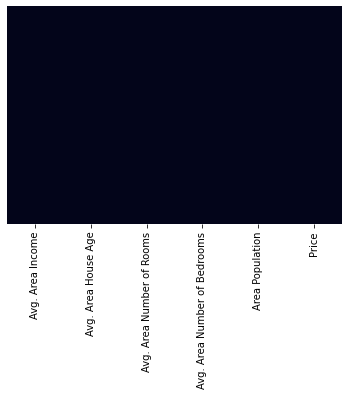

In [6]:
# checking for missing values

sns.heatmap(df.isna(), yticklabels=False, cbar=False)

# from this plot, we conclude that there is no missing data present in this dataframe

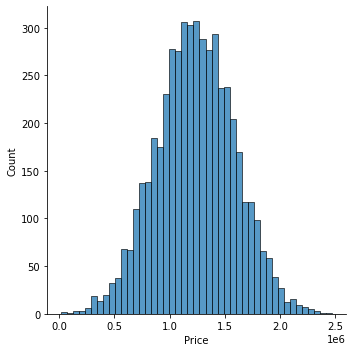

In [14]:
# checking the distribution

sns.displot(df['Price'])

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [17]:
# Select the features and the target array

X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = df['Price']

In [19]:
# splitting data as training and testing data for validating the results

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [20]:
# Linear Regression model 

lm = LinearRegression()     # intantiate the linear model
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicting for the test values

print(lm.intercept_)
print(lm.coef_)

pred = lm.predict(X_test)

print("Mean Squared Error: ",metrics.mean_squared_error(y_test, pred))
print("R^2 Score: ", metrics.r2_score(y_test, pred))

-2638673.426190581
[2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]
Mean Squared Error:  10068422551.400927
R^2 Score:  0.9146818498754012


<h2>2) KNN</h2>

In [29]:
df_c = pd.read_csv("F:\\Datasets\\diabetes_csv.csv")
df_c.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [31]:
df_c.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [32]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


<AxesSubplot:>

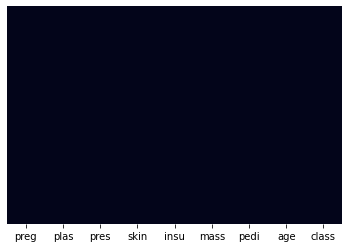

In [34]:
sns.heatmap(df_c.isna(), yticklabels=False, cbar=False)

# hence there are no missing values present in the data

In [40]:
# Standard Scaling the data

scaler = StandardScaler()       # intialization
scaler.fit(df_c.drop('class',axis=1))

scaled_features = scaler.transform(df_c.drop('class',axis=1))

In [41]:
df_feat = pd.DataFrame(scaled_features, columns= df_c.columns[:-1])
df_feat[:5]

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [46]:
# converting categorical data to numerical

encoder = LabelEncoder()    # intialization
encoded = encoder.fit_transform(df_c['class'])
df_c['Class'] = encoded

In [48]:
# make X and y

X = scaled_features
y = df_c['Class']

In [49]:
# splitting into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [51]:
# Let's try for k = 1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
# prediction for k=1

pred = knn.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       151
           1       0.46      0.45      0.45        80

    accuracy                           0.62       231
   macro avg       0.58      0.58      0.58       231
weighted avg       0.62      0.62      0.62       231

[[108  43]
 [ 44  36]]


In [53]:
# choosing best k-value

error_rate = []

for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    pred_i = knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'k values vs Error rate')

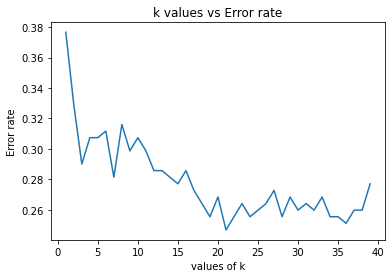

In [57]:
sns.lineplot(x= range(1,40), y= error_rate)
plt.xlabel("values of k")
plt.ylabel("Error rate")
plt.title("k values vs Error rate")

In [58]:
# from plot we see for value k= 21 error rate is low, this is also called elbow point

knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.53      0.60        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

[[132  19]
 [ 38  42]]


<h2>3) DecisionTreeClassifier</h2>

In [60]:
dt = DecisionTreeClassifier()   # intiating the model
dt.fit(X_train, y_train)

pred = dt.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.56      0.72      0.63        80

    accuracy                           0.71       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.71      0.72       231

[[106  45]
 [ 22  58]]


<h2>4) RandomForestClassifier</h2>

In [68]:
rf = RandomForestClassifier(n_estimators= 400)
rf.fit(X_train, y_train)

pred = rf.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       151
           1       0.64      0.61      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

[[124  27]
 [ 31  49]]


<h2>5) LogisticRegression</h2>

In [69]:
log = LogisticRegression()
log.fit(X_train, y_train)

pred = log.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[120  31]
 [ 30  50]]


<h2>6) SVC</h2>

In [71]:
svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[125  26]
 [ 32  48]]


<h2>SGDClassifier</h2>

In [72]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)

pred = sgd.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       151
           1       0.48      0.46      0.47        80

    accuracy                           0.64       231
   macro avg       0.60      0.60      0.60       231
weighted avg       0.64      0.64      0.64       231

[[111  40]
 [ 43  37]]


<h2>Hyper Parameter Tuning</h2>

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha':[0.0001, 0.001, 0.01, 0.1],
                'n_jobs': [-1],
                'learning_rate':['optimal','adaptive']
                }

grid = GridSearchCV(SGDClassifier(), param_grid, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END alpha=0.0001, learning_rate=optimal, n_jobs=-1;, score=0.704 total time=   0.0s
[CV 2/5] END alpha=0.0001, learning_rate=optimal, n_jobs=-1;, score=0.685 total time=   0.0s
[CV 3/5] END alpha=0.0001, learning_rate=optimal, n_jobs=-1;, score=0.738 total time=   0.0s
[CV 4/5] END alpha=0.0001, learning_rate=optimal, n_jobs=-1;, score=0.729 total time=   0.0s
[CV 5/5] END alpha=0.0001, learning_rate=optimal, n_jobs=-1;, score=0.738 total time=   0.0s
[CV 1/5] END alpha=0.0001, learning_rate=adaptive, n_jobs=-1;, score=nan total time=   0.0s
[CV 2/5] END alpha=0.0001, learning_rate=adaptive, n_jobs=-1;, score=nan total time=   0.0s
[CV 3/5] END alpha=0.0001, learning_rate=adaptive, n_jobs=-1;, score=nan total time=   0.0s
[CV 4/5] END alpha=0.0001, learning_rate=adaptive, n_jobs=-1;, score=nan total time=   0.0s
[CV 5/5] END alpha=0.0001, learning_rate=adaptive, n_jobs=-1;, score=nan total time=   0.0s
[CV 1/5] END al

C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 890, in fit
    return self._fit(
  File "C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 649, in _fit
    self._val

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['optimal', 'adaptive'],
                         'n_jobs': [-1]},
             verbose=3)

In [77]:
grid.best_params_
grid.best_estimator_

SGDClassifier(alpha=0.1, n_jobs=-1)

In [78]:
pred = grid.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       151
           1       0.67      0.60      0.63        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231

[[127  24]
 [ 32  48]]
